In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error

In [5]:
df_data = pd.read_excel('boston_house_data.xlsx', index_col=0)

In [6]:
df_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


#### df_data (Data, x)

- 0 : **범죄율**
- 1 : **25,000 평방피트를 초과하는 거주지역 비율**
- 2 : **비소매상업지역 면적 비율** 
- 3 : **찰스강의 경계에 위치한 경우는 1, 아니면 0**
- 4 : **일산화질소 농도**
- 5 : **주택당 방 수 (거실 외 subroom)**
- 6 : **1940년 이전에 건축된 주택의 비율**
- 7 : **직업센터의 거리**
- 8 : **방사형 고속도로까지의 거리**
- 9 : **재산세율**
- 10 : **학생/교사 비율**
- 11 : **인구 중 흑인 비율**
- 12 : **인구 중 하위 계층 비율**

In [7]:
df_target = pd.read_excel('boston_house_target.xlsx', index_col=0)
df_target.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [8]:
df_main = pd.concat([df_data, df_target], axis=1) # concatenate
df_main.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
df_main.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'] 
df_main.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
boston_data = np.array(df_data)
boston_target = np.array(df_target)

In [11]:
boston_X = boston_data[:, 12:13] # 인구 중 하위 계층 비율 
boston_X

array([[ 4.98],
       [ 9.14],
       [ 4.03],
       [ 2.94],
       [ 5.33],
       [ 5.21],
       [12.43],
       [19.15],
       [29.93],
       [17.1 ],
       [20.45],
       [13.27],
       [15.71],
       [ 8.26],
       [10.26],
       [ 8.47],
       [ 6.58],
       [14.67],
       [11.69],
       [11.28],
       [21.02],
       [13.83],
       [18.72],
       [19.88],
       [16.3 ],
       [16.51],
       [14.81],
       [17.28],
       [12.8 ],
       [11.98],
       [22.6 ],
       [13.04],
       [27.71],
       [18.35],
       [20.34],
       [ 9.68],
       [11.41],
       [ 8.77],
       [10.13],
       [ 4.32],
       [ 1.98],
       [ 4.84],
       [ 5.81],
       [ 7.44],
       [ 9.55],
       [10.21],
       [14.15],
       [18.8 ],
       [30.81],
       [16.2 ],
       [13.45],
       [ 9.43],
       [ 5.28],
       [ 8.43],
       [14.8 ],
       [ 4.81],
       [ 5.77],
       [ 3.95],
       [ 6.86],
       [ 9.22],
       [13.15],
       [14.44],
       [

In [12]:
boston_Y = boston_target
boston_Y

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

In [15]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(boston_X, boston_Y, test_size=0.3, random_state=0)

In [16]:
model = linear_model.LinearRegression() # 선형회귀

In [17]:
model.fit(x_train, y_train)

LinearRegression()

In [18]:
print('Coefficients: ', model. coef_)

Coefficients:  [[-0.96814078]]


In [21]:
model.predict(x_train)

array([[ 1.47605623],
       [27.30605233],
       [18.3701129 ],
       [29.9781209 ],
       [17.43101634],
       [16.66618512],
       [22.11681773],
       [14.43946132],
       [ 9.18245687],
       [24.85665615],
       [30.34601439],
       [29.70704148],
       [26.99624728],
       [22.40725997],
       [27.33509656],
       [27.79980413],
       [27.24796389],
       [18.96067878],
       [30.54932396],
       [10.67339367],
       [20.60651811],
       [29.46500628],
       [21.87478254],
       [13.70367433],
       [20.17085476],
       [14.32328443],
       [23.50125906],
       [25.660213  ],
       [19.07685567],
       [20.73237641],
       [25.30200091],
       [23.52062187],
       [16.72427357],
       [29.87162541],
       [25.59244315],
       [28.9906173 ],
       [30.4815541 ],
       [19.08653708],
       [11.5737646 ],
       [23.89819678],
       [29.27137812],
       [23.65616158],
       [31.73045571],
       [28.77762633],
       [25.59244315],
       [21

In [22]:
print('MSE(Training data) : ', np.mean((model.predict(x_train) - y_train) ** 2))

MSE(Training data) :  37.933978172880295


In [23]:
print('MSE(Training data) : ', mean_squared_error(model.predict(x_train), y_train))

MSE(Training data) :  37.933978172880295


In [24]:
print('MSE(Test data) : ', mean_squared_error(model.predict(x_test), y_test))

MSE(Test data) :  39.81715050474418


In [25]:
np.sqrt( mean_squared_error(model.predict(x_test), y_test) )

6.310083240714355

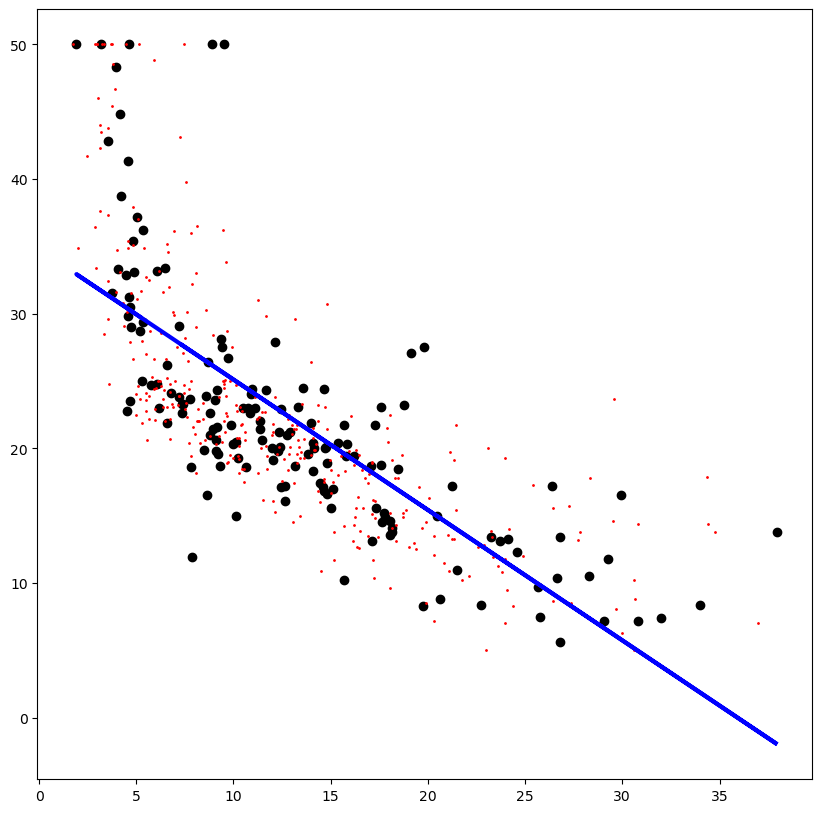

In [26]:
plt.figure(figsize=(10, 10))

plt.scatter(x_test, y_test, color="black") # Test data
plt.scatter(x_train, y_train, color="red", s=1) # Train data

plt.plot(x_test, model.predict(x_test), color="blue", linewidth=3) # Fitted line

plt.show()

In [30]:
diabetes = datasets.load_diabetes()

In [31]:
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [32]:
df = pd.DataFrame(diabetes.data)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [34]:
print(diabetes.data.shape)
print(diabetes.target.shape)

(442, 10)
(442,)


In [35]:
diabetes_X = diabetes.data[:, 2:3] 
diabetes_X

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [36]:
diabetes_Y = diabetes.target
diabetes_Y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [37]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(diabetes_X, diabetes_Y, test_size=0.3, random_state=0)

In [38]:
model = linear_model.LinearRegression()

In [39]:
model.fit(x_train, y_train)

LinearRegression()

In [40]:
print('Coefficients: ', model.coef_)

Coefficients:  [1013.17358257]


In [41]:
print('MSE(Training data) : ', mean_squared_error(model.predict(x_train), y_train))
print('MSE(Test data) : ', mean_squared_error(model.predict(x_test), y_test))

MSE(Training data) :  3892.7208150824304
MSE(Test data) :  3921.3720274248526


In [42]:
np.sqrt( mean_squared_error(model.predict(x_test), y_test) )

62.62085936351283

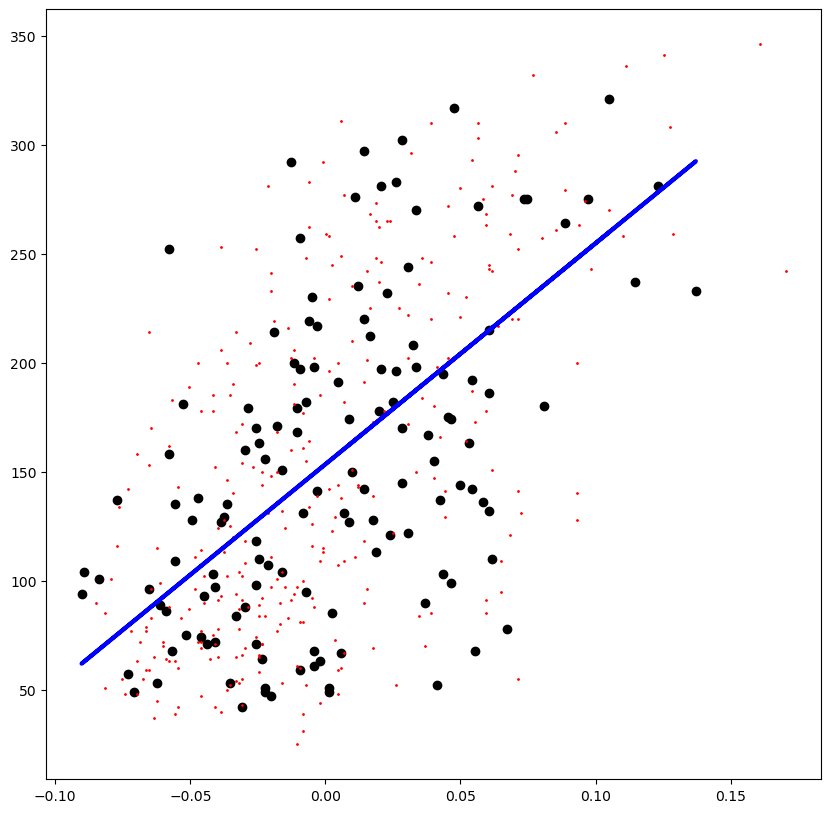

In [43]:
plt.figure(figsize=(10, 10))

plt.scatter(x_test, y_test, color="black") # Test data
plt.scatter(x_train, y_train, color="red", s=1) # Train data

plt.plot(x_test, model.predict(x_test), color="blue", linewidth=3) # Fitted line

plt.show()